[0.022429519669275078, 0.21789900120611982, 0.09307749413609574, 0.17556990044804974, 0.17429057950823973, 0.2928053796505899, 0, 0.0839161005461108, 0.1832781804514171, 0.14571292691838408, 0.22721167597868971, 0.19373778773311248, 0.34119553658904844, 0.2784072162040258, 0.03876680406814694, 0.15126207580422496, 0.08857463819215307, 0.2543561791835174, 0.17866447175303365, 0.07364285027135146, 0.385575801834852, 0.012412960549642187, 0.05304116505650052, 0.07840529575204025, 0.28309689374582997, 0.22060160658735015, 0.27809608223895005, 0.20982378479049776, 0.20302880090891995, 0.101091165536491, 0.09604443388509035, 0, 0.25104929950230004, 0.17401430098519144, 0.1335832484420518, 0.3881060162942147, 0.3418419908297943, 0.015191881300660195, 0.21636635114775798, 0.2992545573977132, 0.2598652185695872, 0.1292958207132121, 0.11873369718935878, 0.07589179825656207, 0.33234188068863413, 0.03127134729479496, 0.2187377738198456, 0.3360863010770406, 0.20192358463165833, 0.051632919392207516

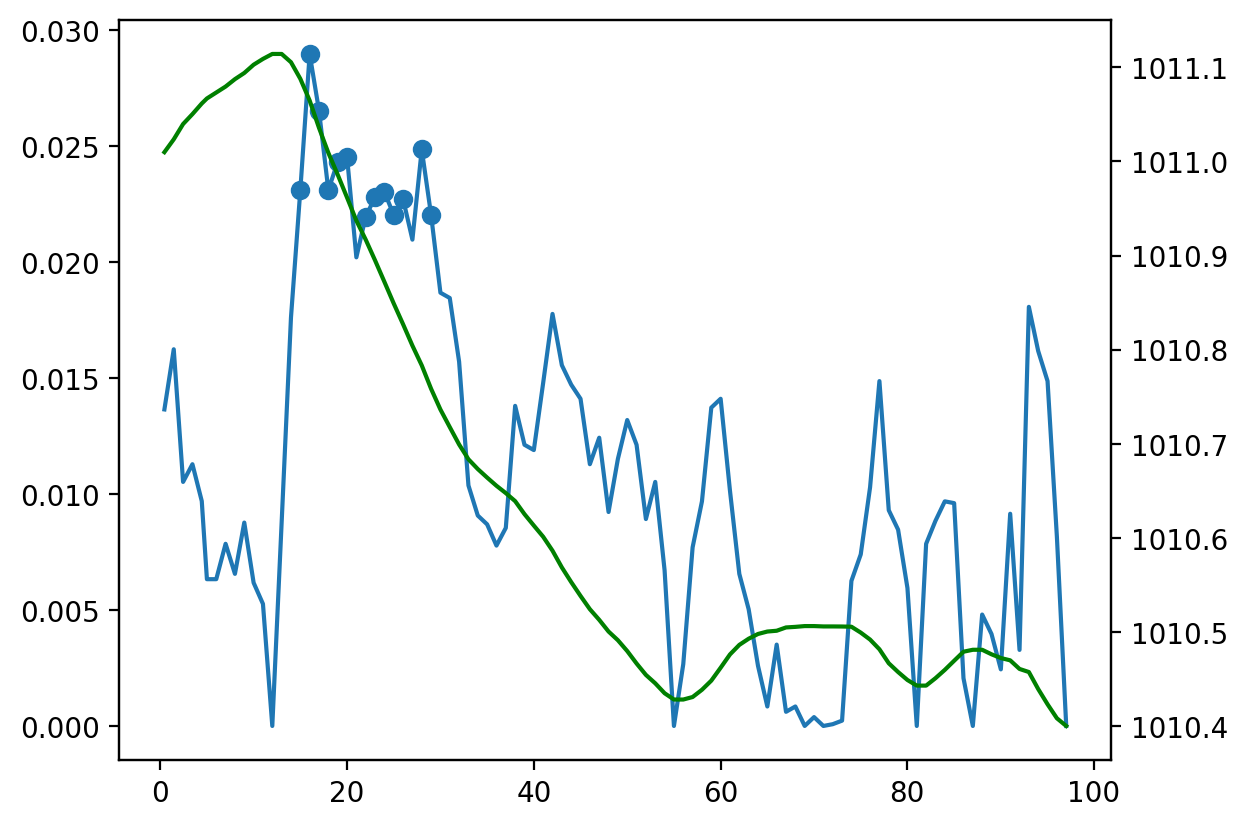

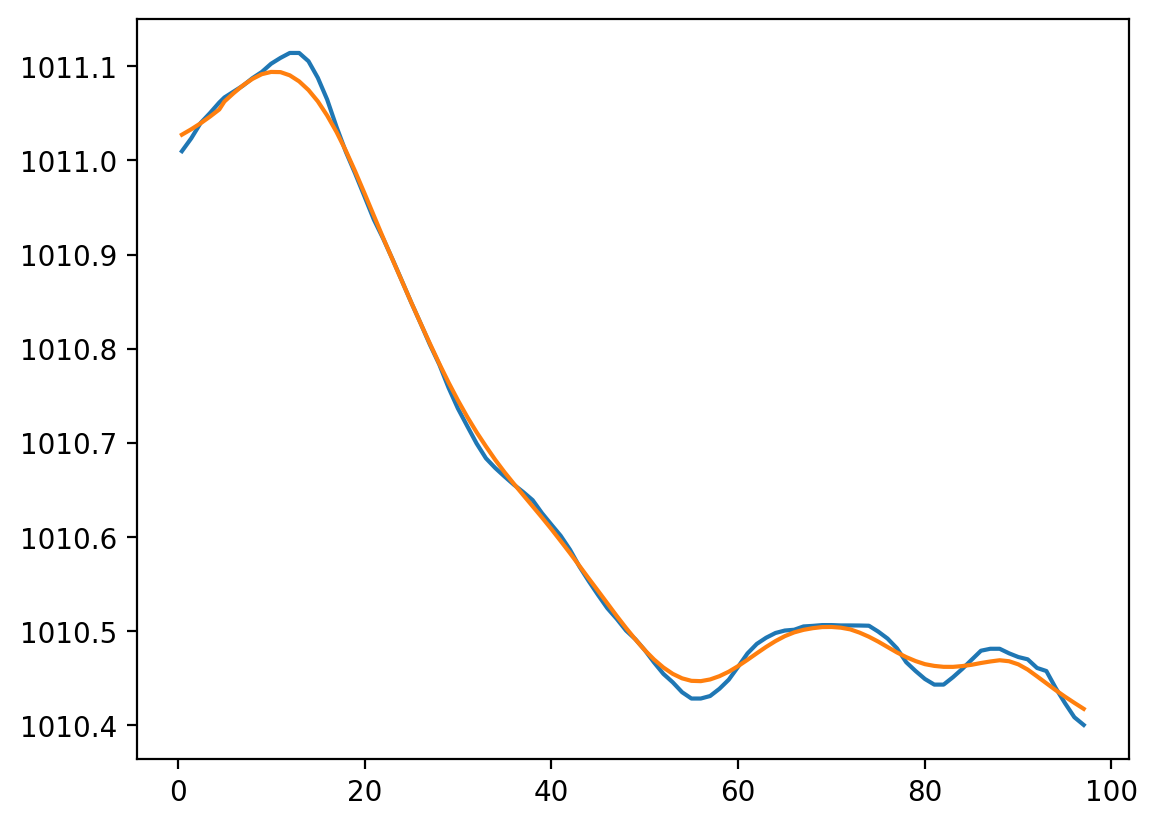

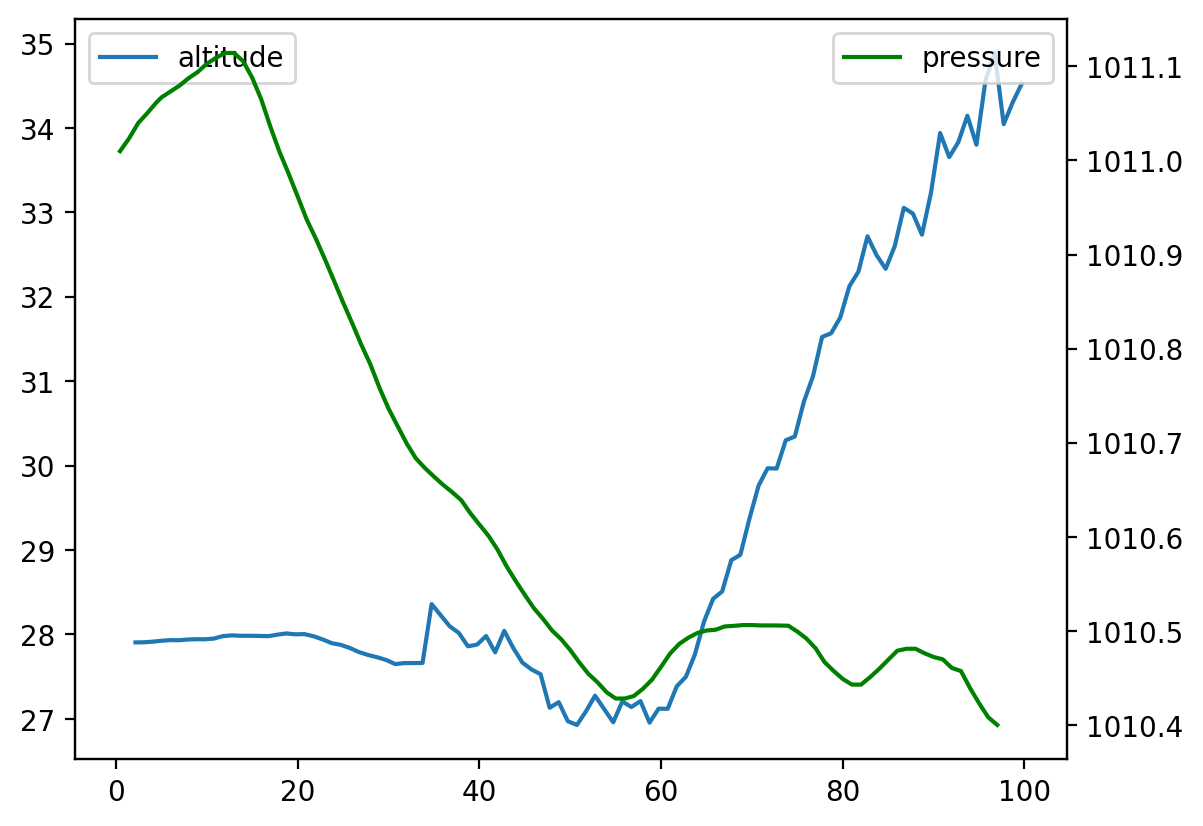

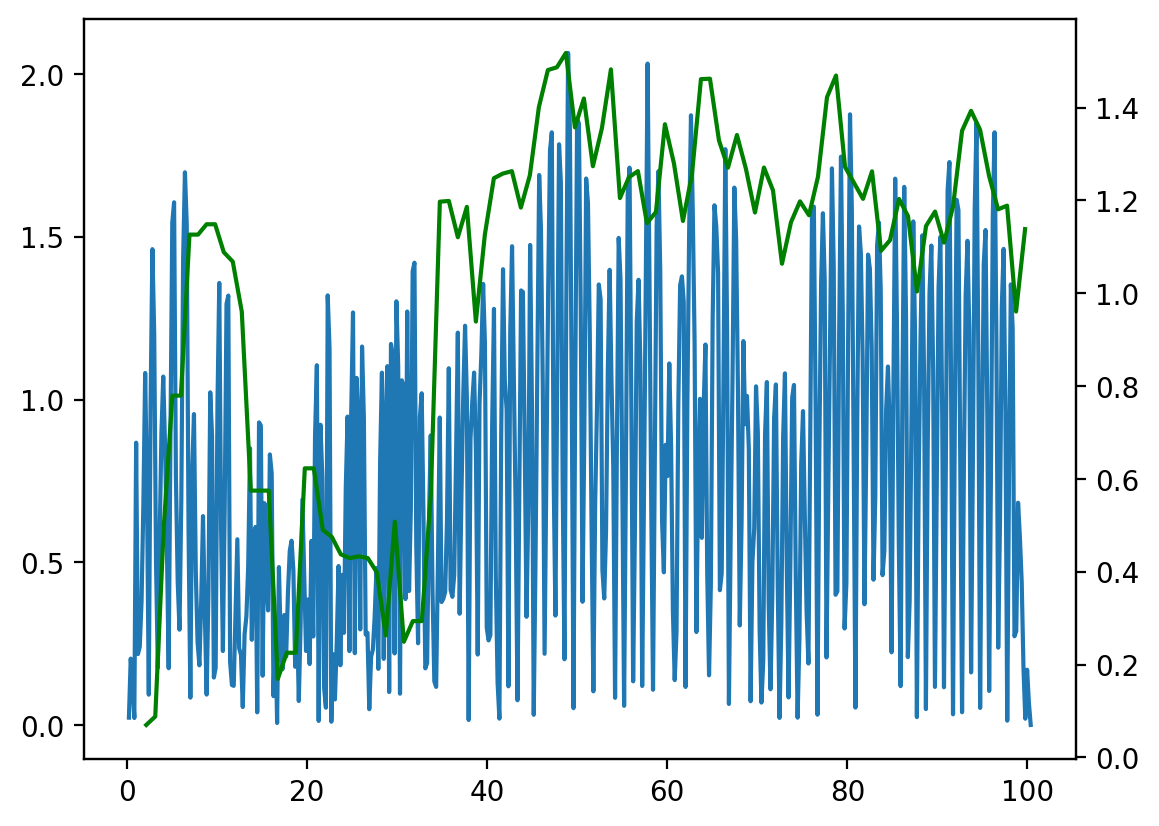

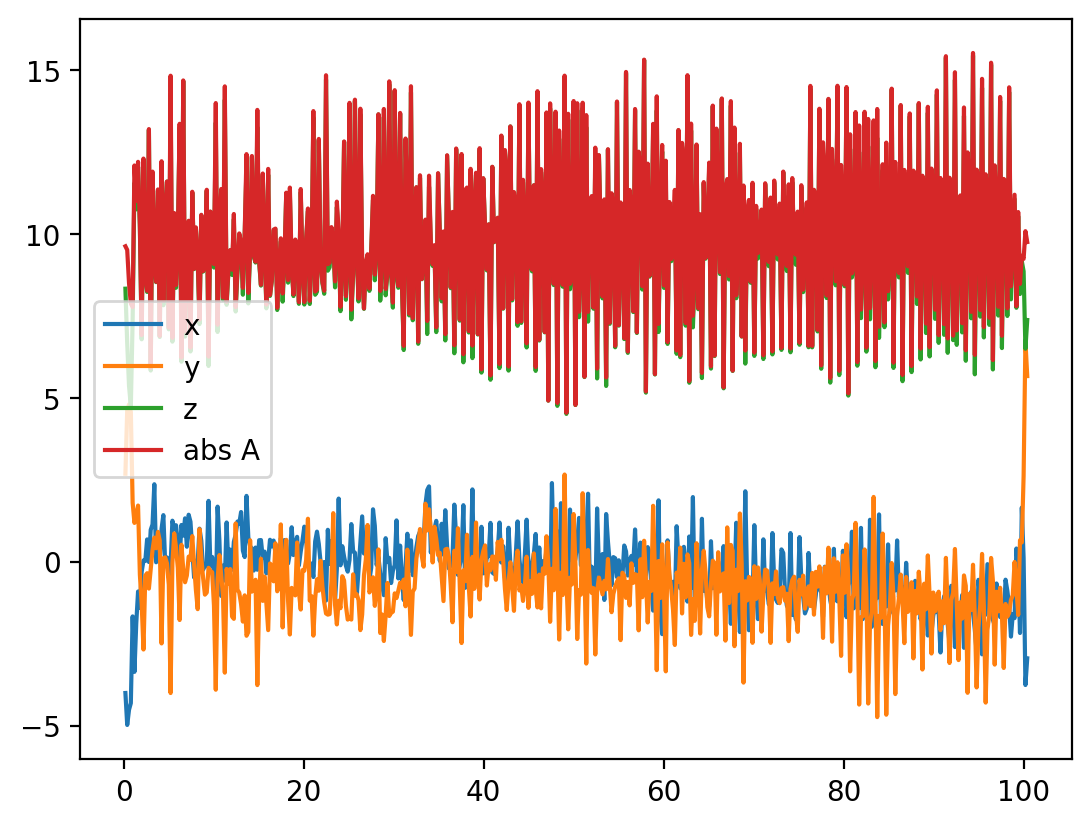

In [70]:

import math
import pandas as pd #package for reading data
import numpy as np
import graphlib
import statistics
import matplotlib.pyplot as plt #package for plots
import gmplot 
from scipy import signal
from scipy import integrate

def gather_function(time_data,data1,data2):
  i = 0
  x = 0
  while i < len(time_data) - 1:
    for n in gps_time:
      if(time_data[i] <= n <=time_data[i+1]):
        data1.append(latitude[x])
        data2.append(longitude[x])
        x = x + 1
    i = i + 1 
  return [data1,data2]

def speedfn (x,y):
  i = 0
  time = y
  #value = reduce_bar
  value = x
  speed = []
  while i <len(x)-1:
    x0, x1 = time.iat[i], time.iat[i+1]
    t = time.iat[i]
    y0, y1 = value[i], value[i+1]
    val = y1-y0
    
    if val < 0 :  # somehow abs() doesn't work
      val *= -1
    speed.append((x1-x0)*(val))
    i = i + 1
  speed.append(0)
  return speed

#main function
def der(x,y):
  """
  derivative of column y of sheet x
  """
  i = 0
  time = x['time']
  #value = reduce_bar
  value = x[y]
  slopes = []
  aslopes = []
  times = []

  while i < len(x)-1: 
    x0, x1 = time.iat[i], time.iat[i+1]
    t = time.iat[i]
    y0, y1 = value[i], value[i+1]
    numerator = y1-y0
    num = numerator
    if numerator < 0 :  # somehow abs() doesn't work
      numerator *= -1
    slope = numerator/(x1-x0)
    #slope = numerator
    aslope = num /(x1-x0)
    #aslope = num
    slopes.append(slope)
    times.append(t)
    aslopes.append(aslope)
    i+=1
  slopes.append(0)
  times.append(0)
  aslopes.append(0)
  return [slopes,times,aslopes]

def complicated(x,y):
  #x: vel , y: rounded time
  a = []
  b = []
  count = 0
  counts = []
  n = 0
  while n < max(y) :
    for i in y:
      if i == n:
        a.append(x[y.index(i)])
        count = count + 1 
    n = n + 1
    counts.append(count)
    count = 0
    if(len(a) == 0):
      b.append(0)
    else:
      b.append(sum(a)/len(a))
    a.clear()
  # for i in y:
  #     if i == n:
  #       a.append(x[y.index(i)])
  #       count = count + 1 
  # n = n + 1
  # counts.append(count)
  # count = 0
  # print(sum(a))
  # print(len(a))
  # print(sum(a)/len(a))
  # b.append(mean(a))
  # a.clear()
  return b

#data 
# gps_data = pd.read_csv('GPS.csv')
# pressure_data = pd.read_csv('Pressure.csv')
# pressure_range = pd.read_csv("Pressure_Range.csv")
# acceleration_data = pd.read_csv("Acceleration.csv")
gps_data = pd.read_csv('Data/newData/stairs+flat_gps.csv')
pressure_data = pd.read_csv('Data/newData/stairs+flat_pressure.csv')
pressure_range = pd.read_csv("Pressure_Range.csv")
acceleration_data = pd.read_csv("Data/newData/stairs+flat_acc.csv")
# gps_data = pd.read_csv('hills_gps.csv')
# pressure_data = pd.read_csv('hills_p.csv')

latitude = gps_data["Latitude"]
longitude = gps_data["Longitude"]
gps_time = gps_data["time"]
gps_speed = gps_data["Speed"]
altitude = gps_data["Altitude"]

pressure_r = pressure_range["Pressure"]
pressure_r_t = pressure_range["time"]
deri_pr = der(pressure_range,"Pressure")
der_pr = deri_pr[0]
der_prt = deri_pr[1]


bar = pressure_data["Pressure"]
bar_time = pressure_data["time"]
reduce_bar = signal.savgol_filter(bar,window_length=11, polyorder=1, mode="nearest")
deri = der(pressure_data,'Pressure')
der_p = deri[0]
der_t = deri[1]
der_a = deri[2]



a_x = acceleration_data["Acceleration x"]
az =acceleration_data["Acceleration z"]
ay = acceleration_data["Acceleration y"]
aa = acceleration_data["abs Acceleration"]
at = acceleration_data["time"]

#deri_a = integrate.cumulative_trapezoid(y=aa,x=at,initial=0)
deri_a = speedfn(aa,at)

newDeri = []
new_at = []
a = 0
while a < len(deri_a) - 1:
  newDeri.append(deri_a[a])
  new_at.append(at[a])
  a = a + 5

# range determination
mean = statistics.mean(der_p)
std = statistics.stdev(der_p)
range = der_p[0] +  std

mean_a = statistics.mean(deri_a)
max_a = max(deri_a)
min_a = min(deri_a)
range2 = mean_a
range1 = (max_a + mean_a)/2
range3 = (min_a + mean_a)/2

#range = der_pr[0]

# Gathering elevated Data
at1 = []
at2 = []
at3 = []
at4 = []
a1 = []
a2 = []
a3 = []
a4 = []
for i in deri_a:
  if i<range3:
    at1.append(at[deri_a.index(i)])
    a1.append(i)
  elif range3<=i<range2:
    at2.append(at[deri_a.index(i)])
    a2.append(i)
  elif range2<=i<range1:
    at3.append(at[deri_a.index(i)])
    a3.append(i)
  elif i>= range1:
    at4.append(at[deri_a.index(i)])
    a4.append(i)

new_at1 = []
for i in at1:
  new_at1.append(math.floor(i))

new_gps_time = []
for i in gps_time:
  new_gps_time.append(math.floor(i))

ass1 = complicated(a1,new_at1)
print(ass1)
print(new_at1)
print(a1)
print(len(ass1))
print(new_gps_time)
print(len(new_gps_time))

a1_la = []
a1_lo = []
a2_la = []
a2_lo = []
a3_la = []
a3_lo = []


range_p = []
range_p_flat = []
range_t = []
range_t_flat = []
range_a = []
range_a_flat = []
for i in der_p:
  if i >= range:
    range_p.append(i)
    range_t.append(der_t[der_p.index(i)])
    range_a.append(der_a[der_p.index(i)])
  else:
    range_p_flat.append(i)
    range_t_flat.append(der_t[der_p.index(i)])
    range_a_flat.append(der_a[der_p.index(i)])

# for n in range_a:
#   if n > 0 :
#     print("u")
#     print(n)
#   else:
#     print("d")
#     print(n)
up_time = []
down_time = []
flat_time = []
for n in range_a:
  if n < 0:
    up_time.append(range_t[range_a.index(n)])
  elif n>0:
    down_time.append(range_t[range_a.index(n)])
  else:
    flat_time.append(range_t[range_a.index(n)])


#Plotting data
fig, ax = plt.subplots()
fig.set_dpi(200)
# ax.plot(abs_t,abs)
ax.plot(bar_time,der_p)
ax.scatter(range_t,range_p)
ax2 = ax.twinx()
ax2.plot(bar_time,bar,color='green')
plt.show()

fig1, ax1 = plt.subplots()
fig1.set_dpi(200)
ax1.plot(bar_time,bar)
ax1.plot(bar_time,reduce_bar)
plt.show()

fig2, ax3 = plt.subplots()
fig2.set_dpi(200)
ax3.plot(gps_time,altitude, label="altitude")
ax3.legend()
ax4 = ax3.twinx()
ax4.plot(bar_time,bar,color='green',label="pressure")
ax4.legend()
plt.show()

fig4,ax6 = plt.subplots()
fig4.set_dpi(200)
ax6.plot(at,deri_a)
ax7 = ax6.twinx()
ax7.plot(gps_time,gps_speed,color='green')
# ax8 = ax7.twinx()
# ax8.plot(new_at,newDeri,color="orange")
plt.show()

fig3 ,ax5 = plt.subplots()
fig3.set_dpi(200)
ax5.plot(at,a_x,label="x")
ax5.plot(at,ay,label="y")
ax5.plot(at,az,label="z")
ax5.plot(at,aa,label="abs A")
#ax5.plot(at,deri_a,label="speed")
plt.legend()
plt.show()

#Gathering co-ordinates of elevated data

        
gps_hill_la = []
gps_hill_lo = []
up_la = []
down_lo = []
up_lo = []
down_la = []
flat_la = []
flat_lo = []
gps = gather_function( range_t,gps_hill_la,gps_hill_lo)
up = gather_function( up_time,up_la,up_lo)
down = gather_function(down_time,down_la,down_lo)
flat = gather_function(flat_time,flat_la ,flat_lo)
# for i in range_t:
#   for n in gps_time:
#     if (i <= n <= ):
#       gps_hill_la.append(latitude[range_t.index(i)])
#       gps_hill_lo.append(longitude[range_t.index(i)])
# there might be an issue in co-ordinate selection

#making the map
lat = latitude.iat[0]
log = longitude.iat[0]

# gmap = gmplot.GoogleMapPlotter(lat, log, zoom=18)
# gmap.plot(latitude, longitude, '#771c2f', size = 0.5, marker = False )
# gmap.marker(latitude[0],longitude[0], color='cornflowerblue')
# # gmap.scatter(gps_hill_la, gps_hill_lo, '#16EBF9', size = 0.5, marker = False  )
# gmap.scatter(up_la, up_lo, '#FFFF00', size = 0.5, marker = False  )
# gmap.scatter(down_la, down_lo, '#16EBF9', size = 0.5, marker = False  )
# gmap.scatter(flat_la, flat_lo, '#771c2f', size = 0.5, marker = False  )

gmap = gmplot.GoogleMapPlotter(lat, log, zoom=18)
gmap.plot(latitude, longitude, '#771c2f', size = 0.5, marker = False )
gmap.marker(latitude[0],longitude[0], color='cornflowerblue')
# gmap.scatter(gps_hill_la, gps_hill_lo, '#16EBF9', size = 0.5, marker = False  )
gmap.scatter(a1_la, a1_lo, '#FFFF00', size = 0.5, marker = False  )
gmap.scatter(a2_la, a2_lo, '#16EBF9', size = 0.5, marker = False  )
gmap.scatter(a3_la, a3_lo, '#FFFFFF', size = 0.5, marker = False  )


# uphill is yellow
# dwonhill is blue 

gmap.draw( "mapping.html" )

#debugging





